# WeightWatcher - VGG

https://calculationconsulting.com

https://towardsdatascience.com/the-w3h-of-alexnet-vggnet-resnet-and-inception-7baaaecccc96


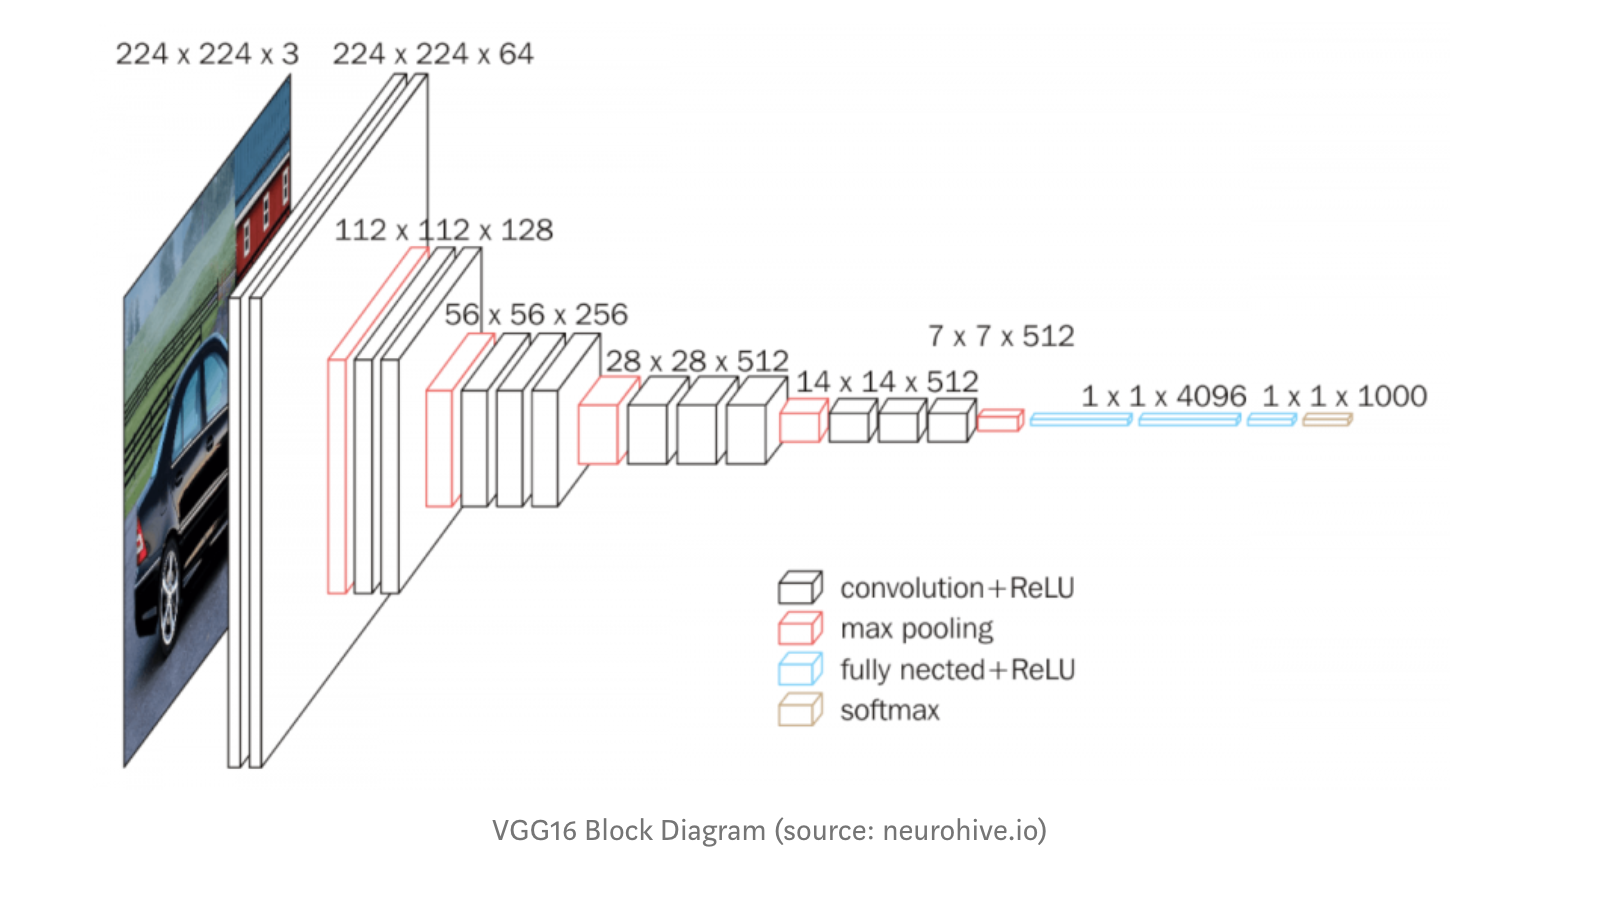

In [1]:
from IPython.display import Image
Image(filename='VGG16.1.png',width=800, height=400)


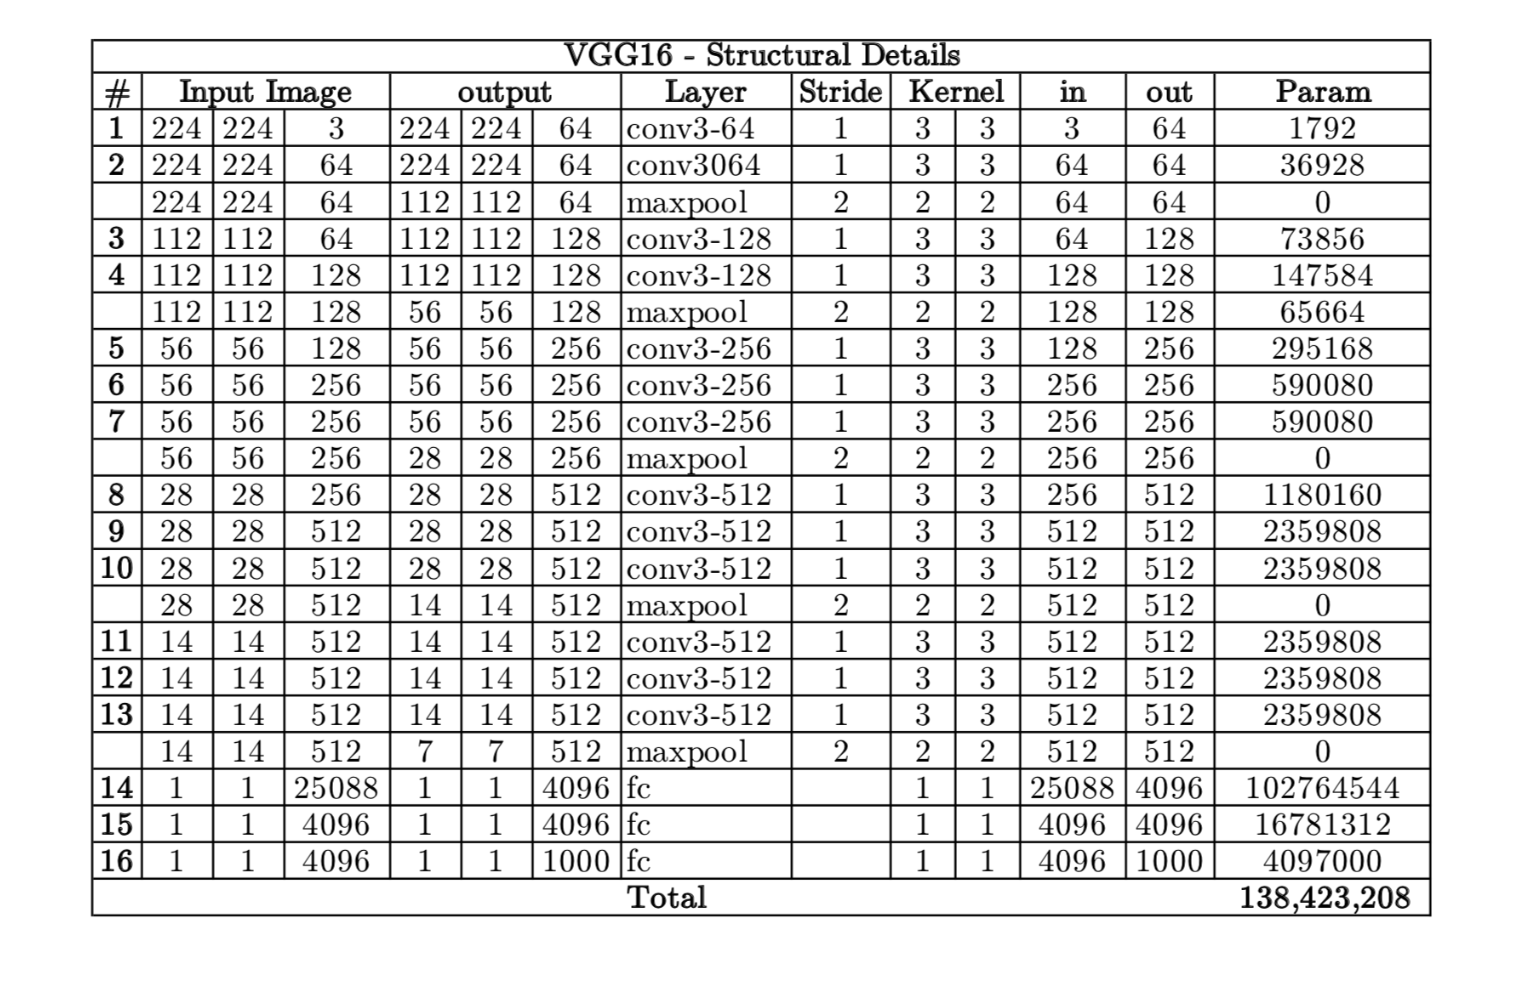

In [2]:
Image(filename='VGG16.2.png',width=800, height=400)


In [3]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [4]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Import WeightWatcher

set custom Logging at WARN Level

In [5]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.WARN)

import weightwatcher as ww
import torchvision.models as models

ww.__version__

Using TensorFlow backend.


'0.2.2'

### Create all models now

Pick colors from https://matplotlib.org/3.1.0/gallery/color/named_colors.html

In [6]:
series_name = 'VGG'
all_names = [ 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn']
colors =    ['indigo', 'blue',    'purple',  'cyan',   'darkgreen','goldenrod','darkorange','red']

In [7]:


all_models = []
all_models.append(models.vgg11(pretrained=True))
all_models.append(models.vgg11_bn(pretrained=True))

all_models.append(models.vgg13(pretrained=True))
all_models.append(models.vgg13_bn(pretrained=True))

all_models.append(models.vgg16(pretrained=True))
all_models.append(models.vgg16_bn(pretrained=True))

all_models.append(models.vgg19(pretrained=True))
all_models.append(models.vgg19_bn(pretrained=True))


### Get reported accuracies from pytorch website

https://pytorch.org/docs/stable/torchvision/models.html

<pre>
<table class="docutils align-default">
<colgroup>
<col style="width: 55%" />
<col style="width: 22%" />
<col style="width: 22%" />
</colgroup>
<thead>
<thead>
<tr class="row-odd"><th class="head"><p>Network</p></th>
<th class="head"><p>Top-1 error</p></th>
<th class="head"><p>Top-5 error</p></th>
</tr>
</thead>
<tbody>

<tr class="row-odd"><td><p>VGG-11</p></td>
<td><p>30.98</p></td>
<td><p>11.37</p></td>
</tr>
<tr class="row-even"><td><p>VGG-13</p></td>
<td><p>30.07</p></td>
<td><p>10.75</p></td>
</tr>
<tr class="row-odd"><td><p>VGG-16</p></td>
<td><p>28.41</p></td>
<td><p>9.62</p></td>
</tr>
<tr class="row-even"><td><p>VGG-19</p></td>
<td><p>27.62</p></td>
<td><p>9.12</p></td>
</tr>
<tr class="row-odd"><td><p>VGG-11 with batch normalization</p></td>
<td><p>29.62</p></td>
<td><p>10.19</p></td>
</tr>
<tr class="row-even"><td><p>VGG-13 with batch normalization</p></td>
<td><p>28.45</p></td>
<td><p>9.63</p></td>
</tr>
<tr class="row-odd"><td><p>VGG-16 with batch normalization</p></td>
<td><p>26.63</p></td>
<td><p>8.50</p></td>
</tr>
<tr class="row-even"><td><p>VGG-19 with batch normalization</p></td>
<td><p>25.76</p></td>
<td><p>8.15</p></td>
</tr>
</tbody>
</table>
</pre>

In [8]:
top1_errors= {
    
    "vgg11": 30.98,
    "vgg11_bn": 29.62,
    "vgg13": 30.07,
    "vgg13_bn": 28.45,
    "vgg16": 28.41,
    "vgg16_bn": 26.63,
    "vgg19": 27.62,
    "vgg19_bn": 25.76,
}

In [9]:
top5_errors= {
    
    "vgg11": 11.37,
    "vgg11_bn": 10.19,
    "vgg13": 10.75,
    "vgg13_bn": 9.63,
    "vgg16": 9.62,
    "vgg16_bn": 8.50,
    "vgg19": 9.12,
    "vgg19_bn": 8.15,
}

### Run WeightWatcher, collect summary and details (as dataframes) for all models

In [10]:
all_details = []
all_summaries = []
for im, name in enumerate(all_names):
    watcher = ww.WeightWatcher(model=all_models[im])
    results = watcher.analyze(alphas=True, softranks=True, spectralnorms=True, mp_fit=True)

    summary =  watcher.get_summary()
    all_summaries.append(summary)
    
    details  = watcher.get_details(results=results)
    details.drop(columns=['slice', 'slice_count'], inplace=True)
    details.dropna(inplace=True)
    details['NxM'] = pd.to_numeric(details.N * details.M)

    all_details.append(details)

2019-12-26 13:16:42,492 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-26 13:16:42,494 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-12-26 13:20:45,664 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-12-26 13:20:46,828 INFO Norm: min: 5.2481255531311035, max: 57.39590072631836, avg: 10.107156753540039
INFO:weightwatcher.weightwatcher:Norm: min: 5.2481255531311035, max: 57.39590072631836, avg: 10.107156753540039
2019-12-26 13:20:46,829 INFO Norm compound: min: 5.895910263061523, max: 57.39590072631836, avg: 19.885963439941406
INFO:weightwatcher.weightwatcher:N

2019-12-26 13:20:48,071 INFO Alpha: min: 1.3854856636971848, max: 3.875876983334032, avg: 2.5724933311485363
INFO:weightwatcher.weightwatcher:Alpha: min: 1.3854856636971848, max: 3.875876983334032, avg: 2.5724933311485363
2019-12-26 13:20:48,072 INFO Alpha compound: min: 1.522580930995347, max: 3.5210144189935715, avg: 2.5370047984035393
INFO:weightwatcher.weightwatcher:Alpha compound: min: 1.522580930995347, max: 3.5210144189935715, avg: 2.5370047984035393
2019-12-26 13:20:48,073 INFO Alpha Weighted: min: 0.6363944562361387, max: 4.999376215087901, avg: 1.8439950665352716
INFO:weightwatcher.weightwatcher:Alpha Weighted: min: 0.6363944562361387, max: 4.999376215087901, avg: 1.8439950665352716
2019-12-26 13:20:48,075 INFO Alpha Weighted compound: min: 1.0371089622425371, max: 4.999376215087901, avg: 2.4581932538546676
INFO:weightwatcher.weightwatcher:Alpha Weighted compound: min: 1.0371089622425371, max: 4.999376215087901, avg: 2.4581932538546676
2019-12-26 13:20:48,076 INFO Spectral No

INFO:weightwatcher.weightwatcher:Spectral Norm: min: 1.3652514219284058, max: 60.19026184082031, avg: 6.149074077606201
2019-12-26 13:25:27,251 INFO Spectral Norm compound: min: 1.8192380666732788, max: 60.19026184082031, avg: 15.788494110107422
INFO:weightwatcher.weightwatcher:Spectral Norm compound: min: 1.8192380666732788, max: 60.19026184082031, avg: 15.788494110107422
2019-12-26 13:25:27,251 INFO Softrank: min: 4.661257021387793, max: 111.76920570424603, avg: 19.1727214516285
INFO:weightwatcher.weightwatcher:Softrank: min: 4.661257021387793, max: 111.76920570424603, avg: 19.1727214516285
2019-12-26 13:25:27,252 INFO Softrank compound: min: 6.632634238129757, max: 111.76920570424603, avg: 29.756186900693315
INFO:weightwatcher.weightwatcher:Softrank compound: min: 6.632634238129757, max: 111.76920570424603, avg: 29.756186900693315
2019-12-26 13:25:27,253 INFO Softrank Log: min: 0.6685030505603375, max: 2.0483221645977814, avg: 1.2156848534874432
INFO:weightwatcher.weightwatcher:Soft

INFO:weightwatcher.weightwatcher:Softrank Log Ratio compound: min: 1.8273460939989072, max: 7.512789536214776, avg: 3.2915339504043315
2019-12-26 13:25:28,610 INFO Marchenko-Pastur (MP) fit sigma: min: 0.3, max: 0.9678710937500002, avg: 0.7094136186079546
INFO:weightwatcher.weightwatcher:Marchenko-Pastur (MP) fit sigma: min: 0.3, max: 0.9678710937500002, avg: 0.7094136186079546
2019-12-26 13:25:28,611 INFO Marchenko-Pastur (MP) fit sigma compound: min: 0.3, max: 0.9678710937500002, avg: 0.7237626953125
INFO:weightwatcher.weightwatcher:Marchenko-Pastur (MP) fit sigma compound: min: 0.3, max: 0.9678710937500002, avg: 0.7237626953125
2019-12-26 13:25:28,613 INFO Number of spikes per MP fit: min: 0, max: 803, avg: 26.863636363636363
INFO:weightwatcher.weightwatcher:Number of spikes per MP fit: min: 0, max: 803, avg: 26.863636363636363
2019-12-26 13:25:28,614 INFO Number of spikes per MP fit compound: min: 0.0, max: 803.0, avg: 124.94444444444443
INFO:weightwatcher.weightwatcher:Number of s

INFO:weightwatcher.weightwatcher:aka, percent_mass, Number of spikes / total number of evals: min: 0.0, max: 0.24124124124124124, avg: 0.05191202179373783
2019-12-26 13:29:38,422 INFO aka, percent_mass, Number of spikes / total number of evals compound: min: 0.0, max: 0.24124124124124124, avg: 0.07430868792039298
INFO:weightwatcher.weightwatcher:aka, percent_mass, Number of spikes / total number of evals compound: min: 0.0, max: 0.24124124124124124, avg: 0.07430868792039298
2019-12-26 13:29:38,423 INFO Softrank for MP fit: min: 0.021615111987280278, max: 2.1280760411510578, avg: 0.7970267743972427
INFO:weightwatcher.weightwatcher:Softrank for MP fit: min: 0.021615111987280278, max: 2.1280760411510578, avg: 0.7970267743972427
2019-12-26 13:29:38,424 INFO Softrank for MP fit compound: min: 0.021615111987280278, max: 1.8787468800639051, avg: 0.6278589334195379
INFO:weightwatcher.weightwatcher:Softrank for MP fit compound: min: 0.021615111987280278, max: 1.8787468800639051, avg: 0.62785893

INFO:weightwatcher.weightwatcher:

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-26 13:29:40,199 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-12-26 13:33:57,174 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-12-26 13:33:58,689 INFO Norm: min: 2.1068990230560303, max: 52.42221450805664, avg: 7.682347774505615
INFO:weightwatcher.weightwatcher:Norm: min: 2.1068990230560303, max: 52.42221450805664, avg: 7.682347774505615
2019-12-26 13:33:58,691 INFO Norm compound: min: 2.452697515487671, max: 52.42221450805664, avg: 16.066328048706055
INFO:weightwatcher.weightwatcher:Norm compound: min: 2.452697515487671, max: 52.42221450805664, avg: 16.066328048706055
2019-12-26 13:33:58,692 INFO LogNorm: min: 0.3236437141895294, max: 1.719515323638916, avg: 0.7937618494033813
INFO:weightwatc

INFO:weightwatcher.weightwatcher:Alpha compound: min: 1.853543286417002, max: 4.015678609398574, avg: 2.816647560031195
2019-12-26 13:34:00,362 INFO Alpha Weighted: min: -0.05021955395170501, max: 5.28496241458978, avg: 1.3551243085548361
INFO:weightwatcher.weightwatcher:Alpha Weighted: min: -0.05021955395170501, max: 5.28496241458978, avg: 1.3551243085548361
2019-12-26 13:34:00,363 INFO Alpha Weighted compound: min: 0.45352451514183456, max: 5.28496241458978, avg: 1.9049098069460684
INFO:weightwatcher.weightwatcher:Alpha Weighted compound: min: 0.45352451514183456, max: 5.28496241458978, avg: 1.9049098069460684
2019-12-26 13:34:00,364 INFO Spectral Norm: min: 0.9277706146240234, max: 58.12254333496094, avg: 4.563252925872803
INFO:weightwatcher.weightwatcher:Spectral Norm: min: 0.9277706146240234, max: 58.12254333496094, avg: 4.563252925872803
2019-12-26 13:34:00,364 INFO Spectral Norm compound: min: 1.4559544324874878, max: 58.12254333496094, avg: 12.74776840209961
INFO:weightwatcher.

2019-12-26 13:38:37,557 INFO Softrank: min: 3.6261652548518204, max: 85.2508077236617, avg: 18.26406567632132
INFO:weightwatcher.weightwatcher:Softrank: min: 3.6261652548518204, max: 85.2508077236617, avg: 18.26406567632132
2019-12-26 13:38:37,558 INFO Softrank compound: min: 4.709204252505799, max: 85.2508077236617, avg: 23.58602106150424
INFO:weightwatcher.weightwatcher:Softrank compound: min: 4.709204252505799, max: 85.2508077236617, avg: 23.58602106150424
2019-12-26 13:38:37,559 INFO Softrank Log: min: 0.5594475922677253, max: 1.9306985024829209, avg: 1.199878834497832
INFO:weightwatcher.weightwatcher:Softrank Log: min: 0.5594475922677253, max: 1.9306985024829209, avg: 1.199878834497832
2019-12-26 13:38:37,560 INFO Softrank Log compound: min: 0.665954611276272, max: 1.9306985024829209, avg: 1.27502873384881
INFO:weightwatcher.weightwatcher:Softrank Log compound: min: 0.665954611276272, max: 1.9306985024829209, avg: 1.27502873384881
2019-12-26 13:38:37,562 INFO Softrank Log Ratio: m

2019-12-26 13:38:39,291 INFO Marchenko-Pastur (MP) fit sigma compound: min: 0.41129123263888895, max: 0.9608723958333335, avg: 0.8070809461805556
INFO:weightwatcher.weightwatcher:Marchenko-Pastur (MP) fit sigma compound: min: 0.41129123263888895, max: 0.9608723958333335, avg: 0.8070809461805556
2019-12-26 13:38:39,291 INFO Number of spikes per MP fit: min: 0, max: 769, avg: 14.891891891891891
INFO:weightwatcher.weightwatcher:Number of spikes per MP fit: min: 0, max: 769, avg: 14.891891891891891
2019-12-26 13:38:39,294 INFO Number of spikes per MP fit compound: min: 0.0, max: 769.0, avg: 77.07407407407408
INFO:weightwatcher.weightwatcher:Number of spikes per MP fit compound: min: 0.0, max: 769.0, avg: 77.07407407407408
2019-12-26 13:38:39,295 INFO aka, percent_mass, Number of spikes / total number of evals: min: 0.0, max: 0.23823823823823823, avg: 0.039083860911903134
INFO:weightwatcher.weightwatcher:aka, percent_mass, Number of spikes / total number of evals: min: 0.0, max: 0.238238238

INFO:weightwatcher.weightwatcher:aka, percent_mass, Number of spikes / total number of evals compound: min: 0.0, max: 0.25325325325325326, avg: 0.05420252337954103
2019-12-26 13:42:57,024 INFO Softrank for MP fit: min: 0.021670897593727236, max: 4.340952452706976, avg: 1.5496448835626222
INFO:weightwatcher.weightwatcher:Softrank for MP fit: min: 0.021670897593727236, max: 4.340952452706976, avg: 1.5496448835626222
2019-12-26 13:42:57,025 INFO Softrank for MP fit compound: min: 0.021670897593727236, max: 3.2664884078276937, avg: 1.2820060209563509
INFO:weightwatcher.weightwatcher:Softrank for MP fit compound: min: 0.021670897593727236, max: 3.2664884078276937, avg: 1.2820060209563509
2019-12-26 13:42:57,026 INFO alpha pNorm: min: 1.1103304938223517, max: 389023.5619199769, avg: 3817.276896529078
INFO:weightwatcher.weightwatcher:alpha pNorm: min: 1.1103304938223517, max: 389023.5619199769, avg: 3817.276896529078
2019-12-26 13:42:57,027 INFO alpha pNorm compound: min: 5.442103770768437, m

2019-12-26 13:42:58,997 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-12-26 13:49:45,695 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-12-26 13:51:05,828 INFO Norm: min: 3.2178001403808594, max: 47.974002838134766, avg: 7.2684478759765625
INFO:weightwatcher.weightwatcher:Norm: min: 3.2178001403808594, max: 47.974002838134766, avg: 7.2684478759765625
2019-12-26 13:51:05,829 INFO Norm compound: min: 3.559237241744995, max: 47.974002838134766, avg: 12.337833404541016
INFO:weightwatcher.weightwatcher:Norm compound: min: 3.559237241744995, max: 47.974002838134766, avg: 12.337833404541016
2019-12-26 13:51:05,830 INFO LogNorm: min: 0.507559061050415, max: 1.6810059547424316, avg: 0.8185057640075684
INFO:weightwatcher.weightwatcher:LogNorm: min: 0.507559061050415, max: 1.6810059547424316, avg: 0.8185057640075684
2019-12-26 13:51:05,832 INFO LogNorm compound: min: 0.5500112771987915, max: 1.6810059547424316, avg: 0.9365

2019-12-26 13:51:07,972 INFO Alpha Weighted: min: 0.2145263550533989, max: 3.591568654707832, avg: 1.158888231628616
INFO:weightwatcher.weightwatcher:Alpha Weighted: min: 0.2145263550533989, max: 3.591568654707832, avg: 1.158888231628616
2019-12-26 13:51:07,973 INFO Alpha Weighted compound: min: 0.3858703649968457, max: 3.591568654707832, avg: 1.5002341935342836
INFO:weightwatcher.weightwatcher:Alpha Weighted compound: min: 0.3858703649968457, max: 3.591568654707832, avg: 1.5002341935342836
2019-12-26 13:51:07,974 INFO Spectral Norm: min: 1.2462561130523682, max: 52.90734100341797, avg: 3.5703370571136475
INFO:weightwatcher.weightwatcher:Spectral Norm: min: 1.2462561130523682, max: 52.90734100341797, avg: 3.5703370571136475
2019-12-26 13:51:07,975 INFO Spectral Norm compound: min: 1.6101893186569214, max: 52.90734100341797, avg: 8.826415061950684
INFO:weightwatcher.weightwatcher:Spectral Norm compound: min: 1.6101893186569214, max: 52.90734100341797, avg: 8.826415061950684
2019-12-26 1

INFO:weightwatcher.weightwatcher:Softrank: min: 2.560294312216315, max: 113.00134528843398, avg: 20.90343073524938
2019-12-26 15:34:38,431 INFO Softrank compound: min: 2.960282809158381, max: 113.00134528843398, avg: 26.73157372502067
INFO:weightwatcher.weightwatcher:Softrank compound: min: 2.960282809158381, max: 113.00134528843398, avg: 26.73157372502067
2019-12-26 15:34:38,437 INFO Softrank Log: min: 0.4082898914152527, max: 2.0530836138185142, avg: 1.2219640154802112
INFO:weightwatcher.weightwatcher:Softrank Log: min: 0.4082898914152527, max: 2.0530836138185142, avg: 1.2219640154802112
2019-12-26 15:34:38,440 INFO Softrank Log compound: min: 0.4677867101849851, max: 2.0530836138185142, avg: 1.292989543418872
INFO:weightwatcher.weightwatcher:Softrank Log compound: min: 0.4677867101849851, max: 2.0530836138185142, avg: 1.292989543418872
2019-12-26 15:34:38,444 INFO Softrank Log Ratio: min: -961.5763551121811, max: 1319.4837830466026, avg: 11.437623808051743
INFO:weightwatcher.weightw

INFO:weightwatcher.weightwatcher:Marchenko-Pastur (MP) fit sigma compound: min: 0.3, max: 1.1173936631944448, avg: 0.8287080439814817
2019-12-26 15:35:58,877 INFO Number of spikes per MP fit: min: 0, max: 678, avg: 10.31159420289855
INFO:weightwatcher.weightwatcher:Number of spikes per MP fit: min: 0, max: 678, avg: 10.31159420289855
2019-12-26 15:35:58,878 INFO Number of spikes per MP fit compound: min: 0.0, max: 678.0, avg: 59.54938271604939
INFO:weightwatcher.weightwatcher:Number of spikes per MP fit compound: min: 0.0, max: 678.0, avg: 59.54938271604939
2019-12-26 15:35:58,879 INFO aka, percent_mass, Number of spikes / total number of evals: min: 0.0, max: 0.24924924924924924, avg: 0.02319228727785951
INFO:weightwatcher.weightwatcher:aka, percent_mass, Number of spikes / total number of evals: min: 0.0, max: 0.24924924924924924, avg: 0.02319228727785951
2019-12-26 15:35:58,880 INFO aka, percent_mass, Number of spikes / total number of evals compound: min: 0.0, max: 0.24924924924924

In [29]:
plt.rcParams.update({'font.size': 16})
from pylab import rcParams
rcParams['figure.figsize'] = 10,10


In [30]:
summary

{'norm': 6.4138823,
 'norm_compound': 11.542905,
 'lognorm': 0.73649406,
 'lognorm_compound': 0.86615425,
 'alpha': 3.0578078027714213,
 'alpha_compound': 2.9531824880317767,
 'alpha_weighted': 0.813032970569857,
 'alpha_weighted_compound': 1.231837513595454,
 'spectralnorm': 2.7366388,
 'spectralnorm_compound': 7.426855,
 'softrank': 20.90343073524938,
 'softrank_compound': 26.73157372502067,
 'softranklog': 1.2219640154802112,
 'softranklog_compound': 1.292989543418872,
 'softranklogratio': 11.437623808051743,
 'softranklogratio_compound': 10.062836545127208,
 'sigma_mp': 0.8457116168478263,
 'sigma_mp_compound': 0.8287080439814817,
 'numofSpikes': 10.31159420289855,
 'numofSpikes_compound': 59.54938271604939,
 'ratio_numofSpikes': 0.02319228727785951,
 'ratio_numofSpikes_compound': 0.04145917012465758,
 'softrank_mp': 2.065111092169673,
 'softrank_mp_compound': 1.7663951277654233,
 'pnorm': 2769.022126548773,
 'pnorm_compound': 20730.648852056293}

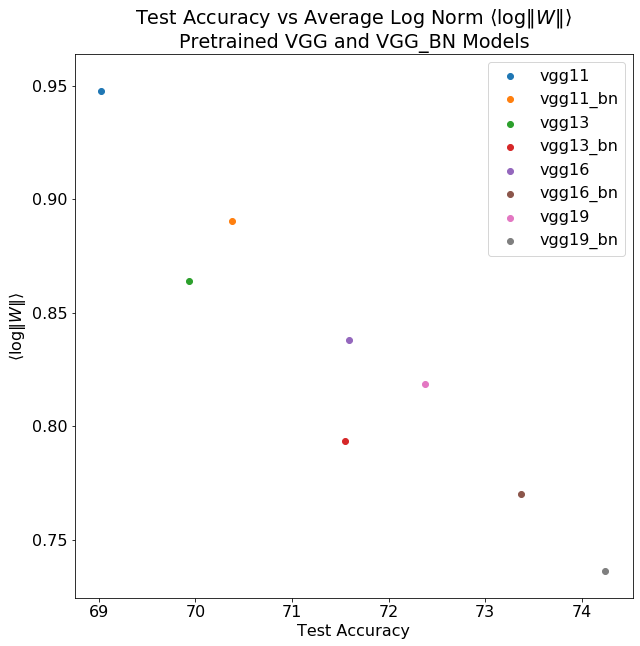

In [61]:
for im, modelname in enumerate(all_names):    
    error = top1_errors[modelname]
    x = 100.0-error
    
    summary = all_summaries[im]
    y = summary["lognorm"]
    
    label = modelname
    plt.scatter(x,y,label=label)

plt.legend()
plt.title(r"Test Accuracy vs Average Log Norm $\langle\log\Vert W\Vert\rangle$"+"\nPretrained VGG and VGG_BN Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"$\langle\log\Vert W\Vert\rangle$");

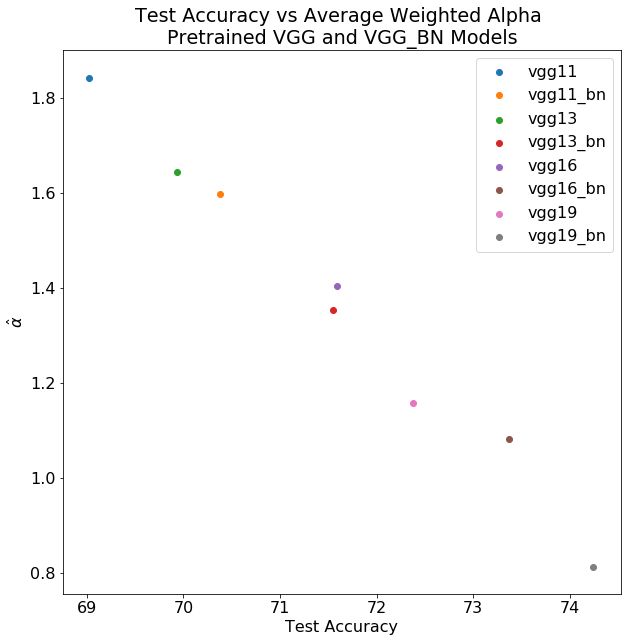

In [62]:
for im, modelname in enumerate(all_names):    
    error = top1_errors[modelname]
    x = 100.0-error
    
    summary = all_summaries[im]
    y = summary["alpha_weighted"]
    
    label = modelname
    plt.scatter(x,y,label=label)

plt.legend()
plt.title(r"Test Accuracy vs Average Weighted Alpha "+"\nPretrained VGG and VGG_BN Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"$\hat{\alpha}$");

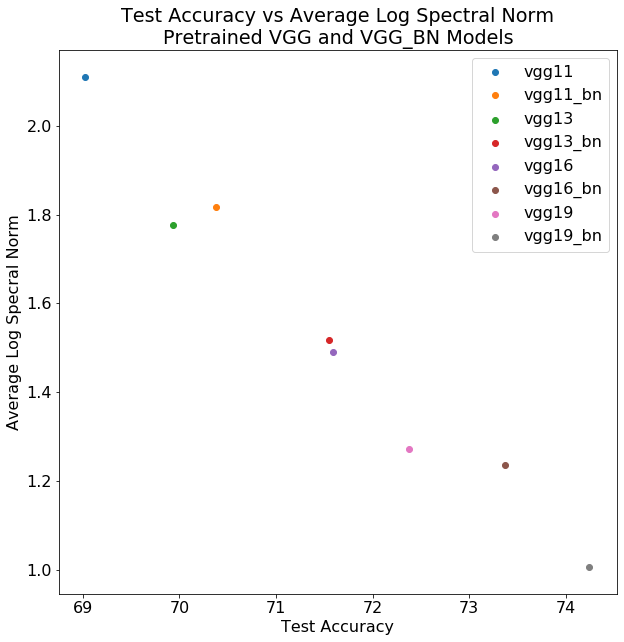

In [63]:
for im, modelname in enumerate(all_names):    
    error = top1_errors[modelname]
    x = 100.0-error
    
    summary = all_summaries[im]
    y = np.log(summary["spectralnorm"])
    
    label = modelname
    plt.scatter(x,y,label=label)

plt.legend()
plt.title(r"Test Accuracy vs Average Log Spectral Norm"+"\nPretrained VGG and VGG_BN Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"Average Log Specral Norm");

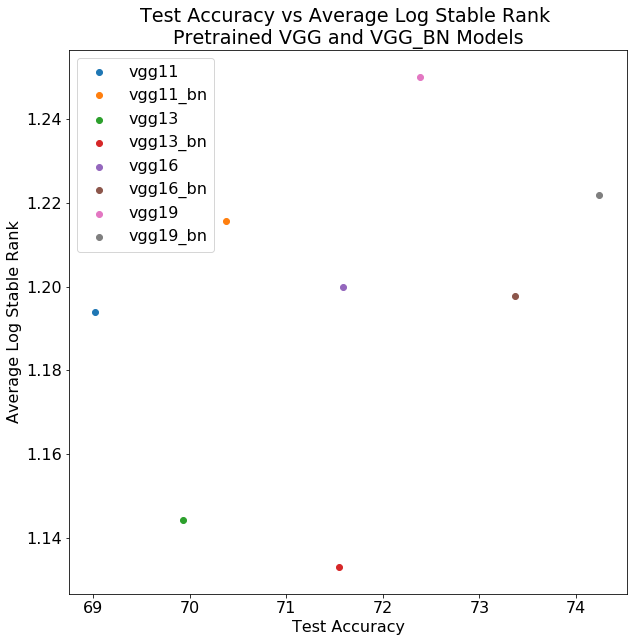

In [64]:
for im, modelname in enumerate(all_names):    
    error = top1_errors[modelname]
    x = 100.0-error
    
    summary = all_summaries[im]
    y = summary["softranklog"]
    
    label = modelname
    plt.scatter(x,y,label=label)

plt.legend()
plt.title(r"Test Accuracy vs Average Log Stable Rank "+"\nPretrained VGG and VGG_BN Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"Average Log Stable Rank");

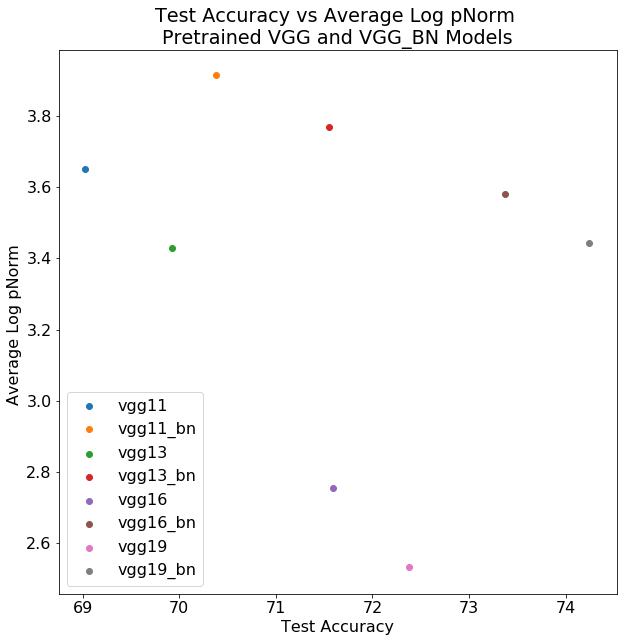

In [65]:
for im, modelname in enumerate(all_names):    
    error = top1_errors[modelname]
    x = 100.0-error
    
    summary = all_summaries[im]
    y = np.log10(summary["pnorm"])
    
    label = modelname
    plt.scatter(x,y,label=label)

plt.legend()
plt.title(r"Test Accuracy vs Average Log pNorm "+"\nPretrained VGG and VGG_BN Models")
plt.xlabel(r"Test Accuracy")
plt.ylabel(r"Average Log pNorm ");

### Histogram of metrics for all layers

Text(0.5, 0, 'alpha $(\\alpha)$')

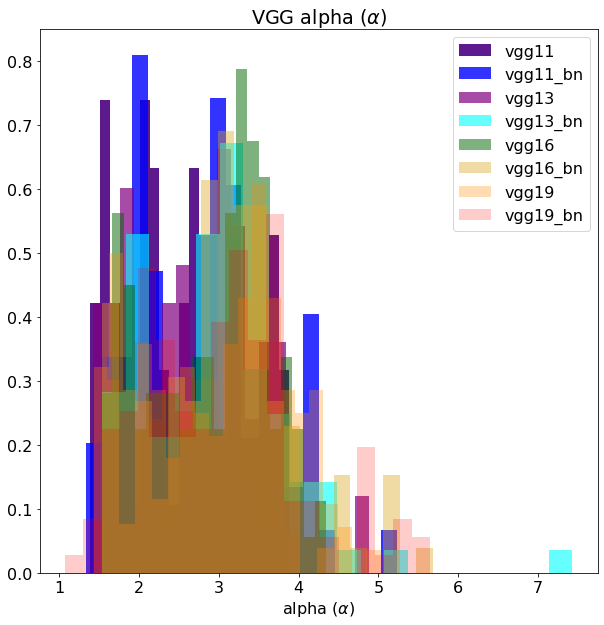

In [49]:
transparency = 1.0
for im, details in enumerate(all_details):
    alphas = details.alpha.to_numpy()
    transparency -= 0.1
    
    plt.hist(alphas, bins=20, label=all_names[im], alpha=transparency, density=True, color=colors[im])
plt.legend()
plt.title(r"{} alpha $(\alpha)$".format(series_name))
plt.xlabel(r"alpha $(\alpha)$")

Text(0.5, 0, 'alpha $(\\alpha)$')

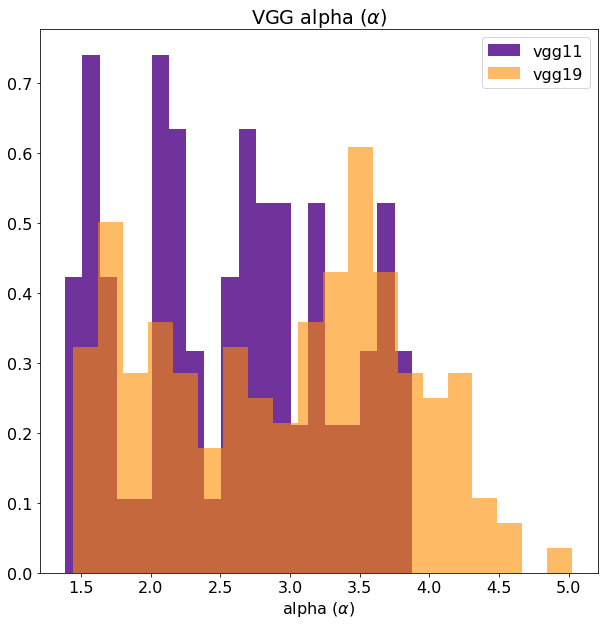

In [50]:
#colors = ['blue', 'green', 'teal',  'red']
transparency = 1.0
for im, details in enumerate(all_details):
    if im == 0 or im == len(all_details)-2:
        alphas = details.alpha.to_numpy()
        transparency -= 0.2

        plt.hist(alphas, bins=20, label=all_names[im], alpha=transparency, density=True, color=colors[im])
plt.legend()
plt.title(r"{} alpha $(\alpha)$".format(series_name))
plt.xlabel(r"alpha $(\alpha)$")

Text(0.5, 0, 'log Stable Rank $(\\log[\\mathcal{R}_{s}])})$')

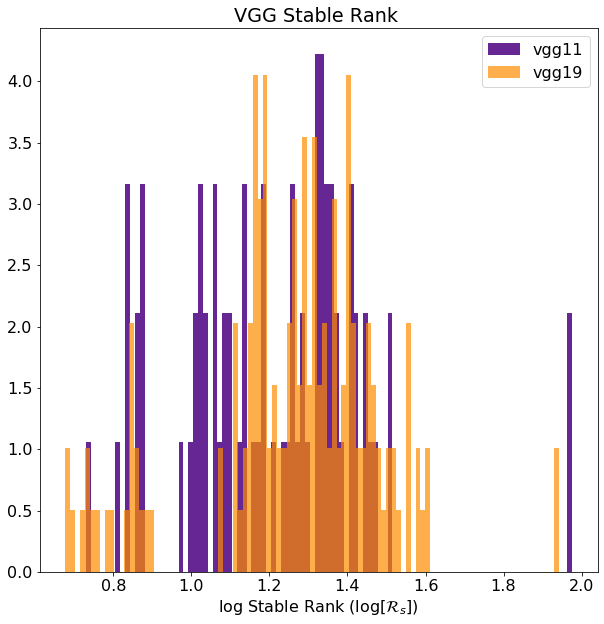

In [51]:
transparency = 1.0
for im, details in enumerate(all_details):
    if im==0 or im == len(all_details)-2:
        logNorm = details.softranklog.to_numpy()
        transparency -= 0.15

        plt.hist(logNorm, bins=100, label=all_names[im], alpha=transparency, color=colors[im], density=True)
plt.legend()
plt.title(r"{} Stable Rank ".format(series_name))
plt.xlabel(r"log Stable Rank $(\log[\mathcal{R}_{s}])})$")

Text(0.5, 0, 'log Frobenius Norm $(\\log\\;\\Vert\\mathbb{W}\\Vert_{F})})$')

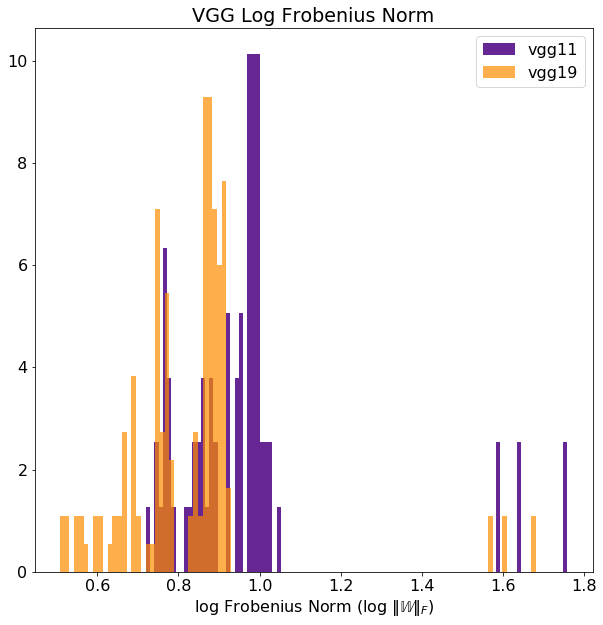

In [52]:
transparency = 1.0
for im, details in enumerate(all_details):
    if im == 0 or im == len(all_details)-2:
        logNorm = details.lognorm.to_numpy()
        transparency -= 0.15

        plt.hist(logNorm, bins=100, label=all_names[im], alpha=transparency, color=colors[im], density=True)#, color=colors[im])
plt.legend()
plt.title(r"{} Log Frobenius Norm".format(series_name))
plt.xlabel(r"log Frobenius Norm $(\log\;\Vert\mathbb{W}\Vert_{F})})$")

Text(0.5, 0, 'log Frobenius Norm $(\\log\\;\\Vert\\mathbb{W}\\Vert_{2})})$')

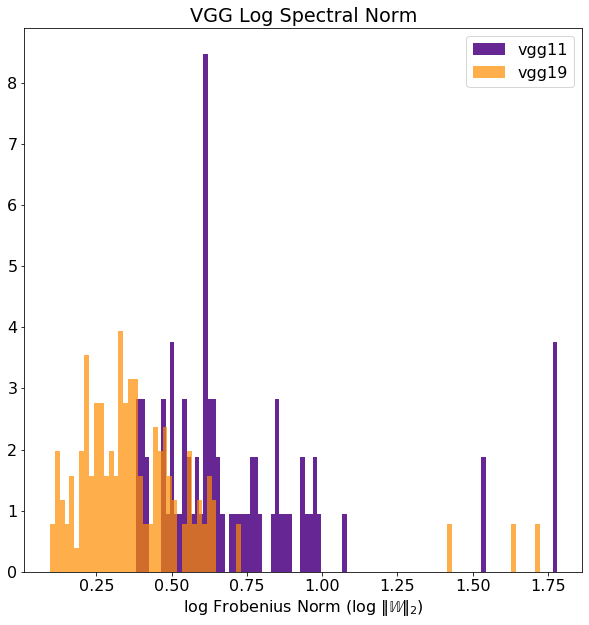

In [53]:
transparency = 1.0
for im, details in enumerate(all_details):
    if im == 0 or im == len(all_details)-2:
        logSpectralNorm = details.spectralnorm.to_numpy()
        logSpectralNorm = np.log10(np.array(logSpectralNorm+0.000001, dtype=np.float))
        transparency -= 0.15

        plt.hist(logSpectralNorm, bins=100, label=all_names[im], alpha=transparency, color=colors[im], density=True)
plt.legend()
plt.title(r"{} Log Spectral Norm".format(series_name))
plt.xlabel(r"log Frobenius Norm $(\log\;\Vert\mathbb{W}\Vert_{2})})$")        

Text(0.5, 0, 'MP Soft Rank $(\\mathcal{R}_{MP})})$')

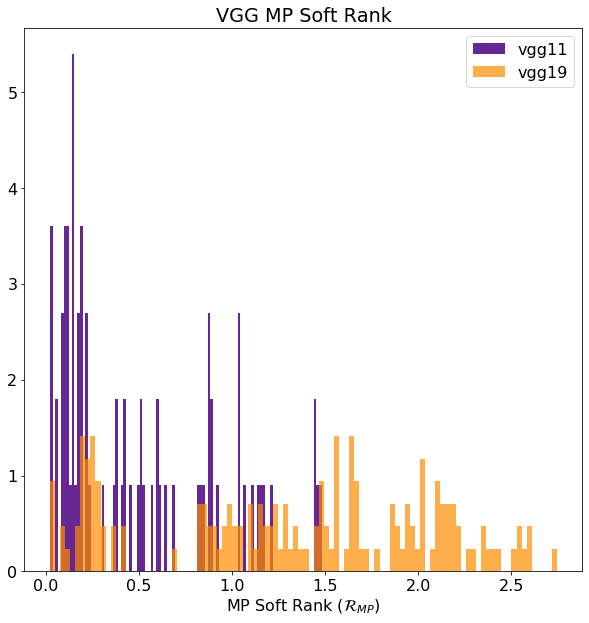

In [54]:
transparency = 1.0
for im, details in enumerate(all_details):
    if im == 0 or im == len(all_details)-2:
        
        metric = details.softrank_mp.to_numpy()
        #logMetric = np.log10(np.array(metric+0.000001, dtype=np.float))
        transparency -= 0.15

        plt.hist(metric, bins=100, label=all_names[im], alpha=transparency, color=colors[im], density=True)
plt.legend()
plt.title(r"{} MP Soft Rank".format(series_name))
plt.xlabel(r"MP Soft Rank $(\mathcal{R}_{MP})})$")   

Text(0.5, 0, 'Log pNorm')

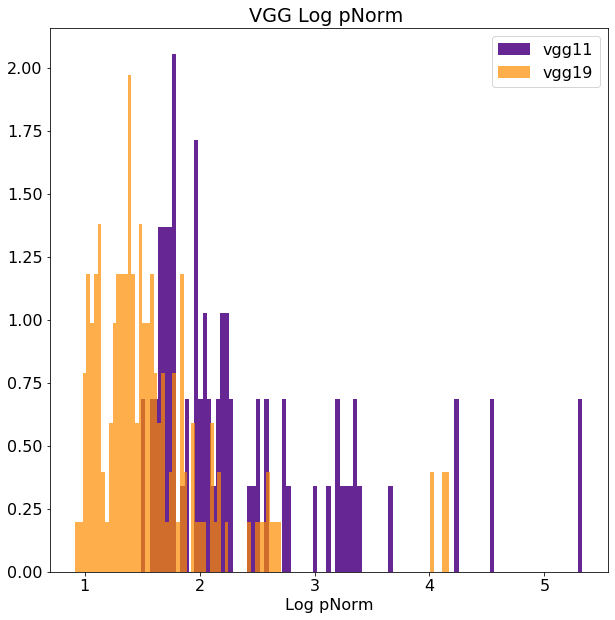

In [55]:
transparency = 1.0
for im, details in enumerate(all_details):
    if im == 0 or im == len(all_details)-2:
        
        metric = details.pnorm.to_numpy()
        logMetric = np.log10(np.array(metric+0.000001, dtype=np.float))

        transparency -= 0.15

        plt.hist(logMetric, bins=100, label=all_names[im], alpha=transparency, color=colors[im], density=True)
plt.legend()
plt.title(r"{} Log pNorm ".format(series_name))
plt.xlabel(r"Log pNorm")   